In [ ]:
# --- STEP 1: Upload the Excel file ---
from google.colab import files
uploaded = files.upload()   # Upload 'student_scores.xlsx' here

In [1]:
import pandas as pd

In [2]:
# Step 2: Read and view the Excel file
df = pd.read_excel('student_scores.xlsx')
print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
  Student     Group  Score
0      A1  Method_A     78
1      A2  Method_A     82
2      A3  Method_A     76
3      A4  Method_A     85
4      A5  Method_A     80


In [7]:
df.shape

(15, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Student  15 non-null     object
 1   Group    15 non-null     object
 2   Score    15 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 492.0+ bytes


In [3]:
# --- STEP 3: Install and import required libraries ---
!pip install openpyxl statsmodels seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


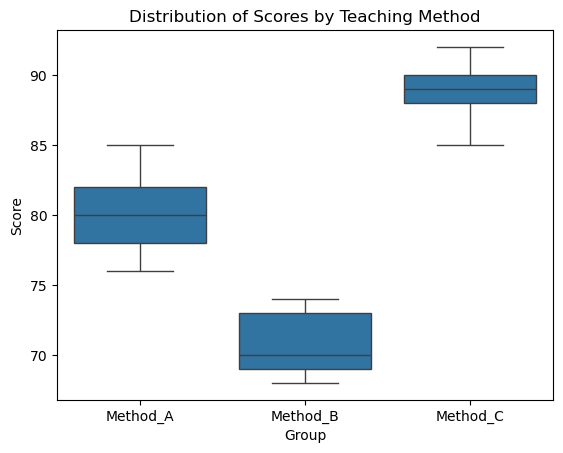

In [4]:
# --- STEP 4: Visualize data using Seaborn ---
sns.boxplot(x='Group', y='Score', data=df)
plt.title("Distribution of Scores by Teaching Method")
plt.show()

In [5]:
# --- STEP 5: Split data into training and testing subsets ---
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
print(f"Training data size: {len(train_df)} | Testing data size: {len(test_df)}")

Training data size: 10 | Testing data size: 5


In [ ]:
# ==========================================================
# STEP 6: CHECK ASSUMPTIONS OF ANOVA
# ==========================================================


Shapiro–Wilk Test for Normality:
Statistic = 0.9277, p-value = 0.4261
 Residuals appear normally distributed.


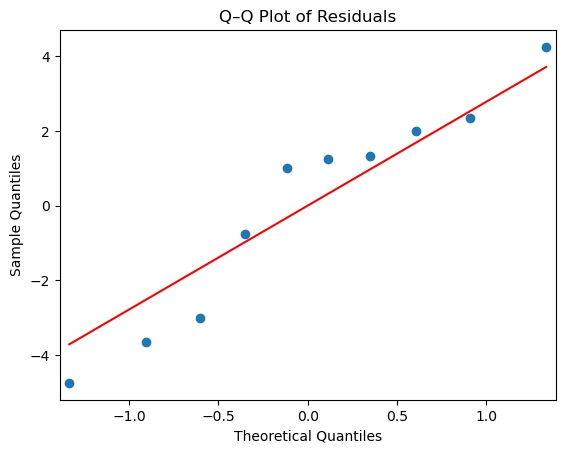

In [8]:
# 1- Normality of residuals (Shapiro–Wilk test)
model = ols('Score ~ C(Group)', data=train_df).fit()
residuals = model.resid
shapiro_test = stats.shapiro(residuals)
print("\nShapiro–Wilk Test for Normality:")
print(f"Statistic = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print(" Residuals appear normally distributed.")
else:
    print(" Residuals may not be normally distributed.")

# Q–Q Plot to visually inspect normality
sm.qqplot(residuals, line='s')
plt.title("Q–Q Plot of Residuals")
plt.show()


In [9]:
# 2- Homogeneity of variances (Levene’s Test)
levene_test = stats.levene(
    train_df.loc[train_df['Group']=='Method_A', 'Score'],
    train_df.loc[train_df['Group']=='Method_B', 'Score'],
    train_df.loc[train_df['Group']=='Method_C', 'Score']
)
print("\nLevene’s Test for Equal Variances:")
print(f"Statistic = {levene_test.statistic:.4f}, p-value = {levene_test.pvalue:.4f}")
if levene_test.pvalue > 0.05:
    print("Variances are homogeneous.")
else:
    print("Variances may not be equal between groups.")


Levene’s Test for Equal Variances:
Statistic = 0.2158, p-value = 0.8111
Variances are homogeneous.


In [ ]:
# ==========================================================
# STEP 7: PERFORM ANOVA
# ==========================================================

# -------------------------------
# Method 1: Detailed ANOVA table (Statsmodels)
# -------------------------------
model = ols('Score ~ C(Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nMethod 1: ANOVA Results (using statsmodels):")
print(anova_table)


Method 1: ANOVA Results (using statsmodels):
              sum_sq    df          F    PR(>F)
C(Group)  810.533333   2.0  47.492188  0.000002
Residual  102.400000  12.0        NaN       NaN


In [11]:


# -------------------------------
# Method 2: Quick F-test (SciPy)
# -------------------------------
# Fit the ANOVA model
model = ols('Score ~ C(Group)', data=df).fit()
# Quick SciPy F-test
groups = [df[df['Group'] == g]['Score'] for g in df['Group'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print(f"\nMethod 2: Quick ANOVA check (using scipy.stats.f_oneway):")
print(f"F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")


Method 2: Quick ANOVA check (using scipy.stats.f_oneway):
F-statistic = 47.49, p-value = 0.0000



Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
Method_A Method_B  -9.0833 0.0216 -16.5637  -1.603   True
Method_A Method_C     7.25 0.0566  -0.2303 14.7303  False
Method_B Method_C  16.3333 0.0013   8.3365 24.3301   True
---------------------------------------------------------


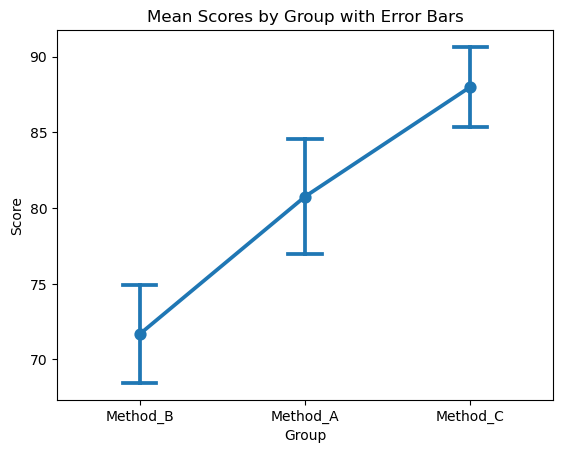

In [12]:
# ==========================================================
# STEP 8: TUKEY’S HSD TEST
# ==========================================================
tukey = pairwise_tukeyhsd(endog=train_df['Score'], groups=train_df['Group'], alpha=0.05)
print("\nTukey HSD Results:")
print(tukey.summary())

# --- STEP 8: Optional – visualize group means ---
sns.pointplot(x='Group', y='Score', data=train_df, capsize=.2, errorbar='sd')
plt.title("Mean Scores by Group with Error Bars")
plt.show()
